In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Import housing price dataset

In [4]:
data = pd.read_csv('dataset/housing_price_dataset.csv')
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


**Preprocess data**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
# Encoding `Neighborhood` column to numeric value
label_encoder = LabelEncoder()
data['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


<Axes: >

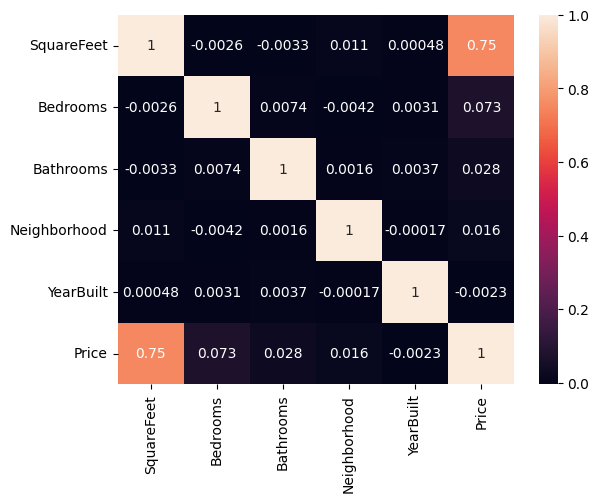

In [14]:
# Correlation matrix
sns.heatmap(data.corr(), annot=True)

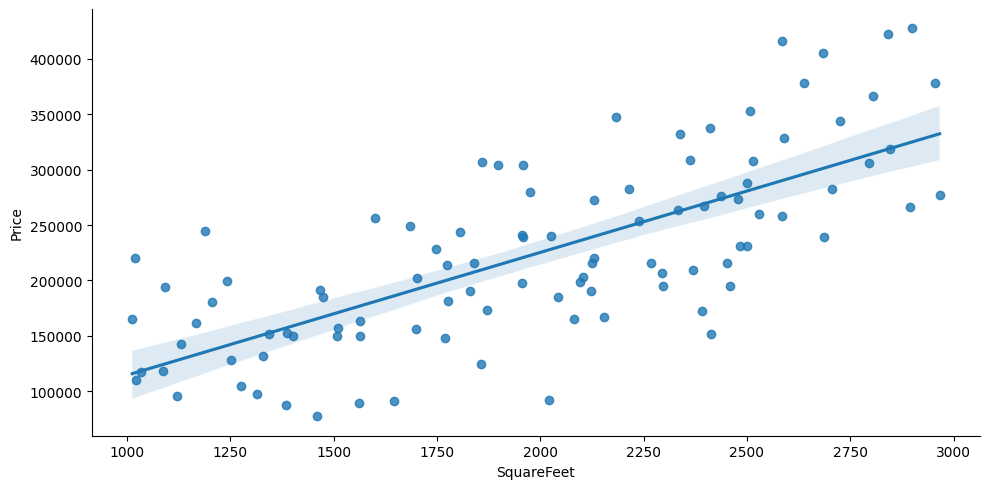

In [17]:
# Visualize SquareFeet -> Price
sns.lmplot(x='SquareFeet', y='Price', data=data[0:100], height=5, aspect=2)

In [7]:
#Seperate the feature vector and target.
y = data['Price']
X = data.drop("Price", axis=1)

In [8]:
#Split data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
6947,2366,4,2,0,2019
36687,2470,4,1,1,1951
27232,1485,5,2,2,1991
41862,1508,4,3,1,2016
2063,2062,2,3,1,1970


### Build `Linear Regression` model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Evaluate the model

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2_score}")

Mean Squared Error: 2497048799.07217
Root Mean Squared Error: 49970.479275990234
Mean Absolute Error: 39958.93288415978
R2 Score: 0.5661012121560204


### Make Predictions

In [24]:
y = y_test.iloc[0]
y_hat = model.predict(X_test.iloc[[0]])[0]

print(f'Ground Truth: {y}, Predict: {y_hat}')

Ground Truth: 227281.45966492905, Predict: 183383.27629108782
